In [22]:
# -*- coding: utf-8 -*-
"""
@author: prasad kamath
"""

import numpy as np;
import sklearn;
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

<font size="5">**1. Wine dataset preparation**<font>

In [23]:
eps=100000
np.random.seed(1992)
# Get data
features, target = load_wine(return_X_y=True)
#normalize data
scaler = StandardScaler()
scaler.fit(features)
features=scaler.transform(features)

In [24]:
x=[]
y=[]
#keep only the first two classes
for i,label in enumerate(target):
    if(label==0 or label==1):
        x.append(features[i])
        y.append(label)
x=np.array(x)
y=np.array(y)

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

In [26]:
bias=np.ones((xtrain.shape[0],1))
xtrain=np.append(xtrain,bias,axis=1)
bias=np.ones((xtest.shape[0],1))
xtest=np.append(xtest,bias,axis=1)

<font size="5">**2. Logistic regression using gradient descent**<font>

<font size="3">**2(a). Logistic regression using sklearn**<font>

In [27]:
model=LogisticRegression(penalty='none',random_state=0).fit(xtrain, ytrain)
ypredicted=(model.predict(xtest))
acc=100*accuracy_score(ypredicted,ytest)
print(classification_report(ytest,ypredicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



<font size="3">**2(b). Logistic regression using gradient descent**<font>

In [28]:
def sigmoid(data):
    return (1.0/(1 + np.exp(-1*data)))

In [29]:
def Lossfunction(weights,data,labels):
    out=np.dot(data,weights)
    ypred=sigmoid(out)
    yk=labels.reshape(labels.shape[0],1)
    op=(yk*np.log(ypred))+((1-yk)*np.log(1-ypred))
    err=-1.0*np.mean(op)
    return err

In [30]:
def WeightUpdateGD(weights,data,labels,stepsize=0.001):
    N=data.shape[0]
    out=np.dot(data,weights)
    ypred=sigmoid(out)
    yk=labels.reshape(ytrain.shape[0],1)
    grad= (1/N)*(np.dot(data.T,(ypred-yk)))
    update=grad*stepsize
    weights-=update
    return weights

In [31]:
def Predict(weights,data):
    yp=[]
    ypred=sigmoid(np.dot(data,weights))
    for y in ypred:
        if(y>=0.5):
            yp.append(1)
        else:
            yp.append(0)
    return yp

In [32]:
epochs=eps
weights=np.random.rand(xtrain.shape[1],1)
loss_GD=[]
for epoch in range(epochs):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_GD.append(loss)
    weights=WeightUpdateGD(weights,xtrain,ytrain,0.01)
    ypred= Predict(weights,xtest)
    acc=100*accuracy_score(ytest,ypred)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))
print("Final loss= {0}".format(loss))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

Final loss= 0.0024378625946884476


<font size="5">**3. Logistic regression using random coordinate descent**<font>

In [33]:
def WeightUpdateRCD(weights,data,labels,stepsize=0.01):
    N=data.shape[0]
    ypred=sigmoid(np.dot(data,weights))
    yk=labels.reshape(ytrain.shape[0],1)
    grad= (1/N)*(np.dot(data.T,(ypred-yk)))
    update=-1.0*grad*stepsize
    #get index of random coordinate and update only that index
    indx=np.random.randint(0,14)
    updatemod=np.zeros((14,1),np.float64)
    updatemod[indx]=update[indx]
    weights=np.add(weights,updatemod)
    return weights

In [34]:
epochs=eps
weights=np.random.rand(xtrain.shape[1],1)
loss_RCD=[]
for epoch in range(epochs):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_RCD.append(loss)
    weights=WeightUpdateRCD(weights,xtrain,ytrain,stepsize=0.01)
    ypred= Predict(weights,xtest)
    #print(loss)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))
print("Final loss= {0}".format(loss))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

Final loss= 0.021110415947651052


<font size="5">**4. Logistic regression using Greedy coordinate descent**<font>

<font size="3">**4(a). Logistic regression using Greedy coordinate descent vs Gradient descent and Random selection Coordinate descent**<font>

In [35]:
def WeightUpdateCD(weights,data,labels,stepsize=0.01):
    N=data.shape[0]
    ypred=sigmoid(np.dot(data,weights))
    yk=labels.reshape(ytrain.shape[0],1)
    grad= (1/N)*(np.dot(data.T,(ypred-yk)))
    #find max gradient
    max_indx=np.argmax(np.abs(grad))
    update=-1.0*grad*stepsize
    #get index of random coordinate and update only that index
    indx=np.random.randint(0,14)
    updatemod=np.zeros((14,1),np.float64)
    updatemod[max_indx]=update[max_indx]
    weights=np.add(weights,updatemod)
    return weights

In [36]:
epochs=eps
weights=np.random.rand(xtrain.shape[1],1)
loss_CD=[]
for epoch in range(epochs):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_CD.append(loss)
    weights=WeightUpdateCD(weights,xtrain,ytrain,stepsize=0.01)
    ypred= Predict(weights,xtest)
    #print(loss)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))
print("Final loss= {0}".format(loss))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        21

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Final loss= 0.012439214869525858


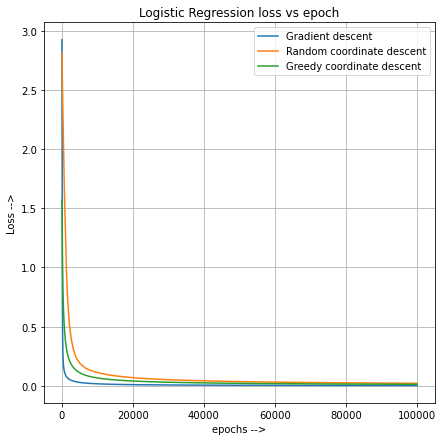

In [37]:
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Logistic Regression loss vs epoch')
plt.xlabel('epochs -->')
plt.ylabel('Loss -->')
curve1,=ax1.plot(loss_GD)
curve2,=ax1.plot(loss_RCD)
curve3,=ax1.plot(loss_CD)
plt.grid(visible='True')
curve1.set_label('Gradient descent')
curve2.set_label('Random coordinate descent')
curve3.set_label('Greedy coordinate descent')
plt.legend()

<font size="3">**4(b). Logistic regression using Greedy coordinate descent for different weight initializations**<font>

In [38]:
epochs=eps
weights=np.random.rand(xtrain.shape[1],1)
loss_CD_rw=[]
for epoch in range(epochs):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_CD_rw.append(loss)
    weights=WeightUpdateCD(weights,xtrain,ytrain,stepsize=0.01)
    ypred= Predict(weights,xtest)
    #print(loss)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        21

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [39]:
epochs=eps
weights=np.zeros((xtrain.shape[1],1))
loss_CD_zw=[]
for epoch in range(epochs):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_CD_zw.append(loss)
    weights=WeightUpdateCD(weights,xtrain,ytrain,stepsize=0.01)
    ypred= Predict(weights,xtest)
    #print(loss)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



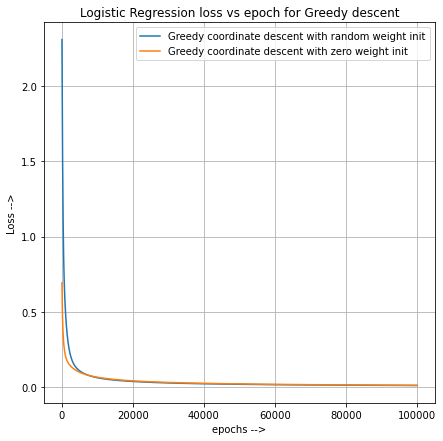

In [40]:
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Logistic Regression loss vs epoch for Greedy descent')
plt.xlabel('epochs -->')
plt.ylabel('Loss -->')
curve1,=ax1.plot(loss_CD_rw)
curve2,=ax1.plot(loss_CD_zw)
plt.grid(visible='True')
curve1.set_label('Greedy coordinate descent with random weight init')
curve2.set_label('Greedy coordinate descent with zero weight init')
plt.legend()

<font size="3">**4(c). Logistic regression using Greedy coordinate descent for different learning rates**<font>

In [41]:
epochs=eps
step_sizes=[0.0001,0.001,0.005,0.01]
loss_alpha={}
seed=np.random.seed(1992)
for alpha in step_sizes:
    weights=np.random.rand(xtrain.shape[1],1)
    loss_CD_rw=[]
    for epoch in range(epochs):
        loss=Lossfunction(weights,xtrain,ytrain)
        loss_CD_rw.append(loss)
        weights=WeightUpdateCD(weights,xtrain,ytrain,stepsize=0.01)
        ypred= Predict(weights,xtest)
    ypred= Predict(weights,xtest)
    acc=100*accuracy_score(ytest,ypred)
    print("Test accuracy for Greedy Coordinate descent with alpha ={0} : {1}%".format(alpha,acc))
    loss_alpha[alpha]=loss_CD_rw
    

Test accuracy for Greedy Coordinate descent with alpha =0.0001 : 97.67441860465115%
Test accuracy for Greedy Coordinate descent with alpha =0.001 : 97.67441860465115%
Test accuracy for Greedy Coordinate descent with alpha =0.005 : 100.0%
Test accuracy for Greedy Coordinate descent with alpha =0.01 : 100.0%


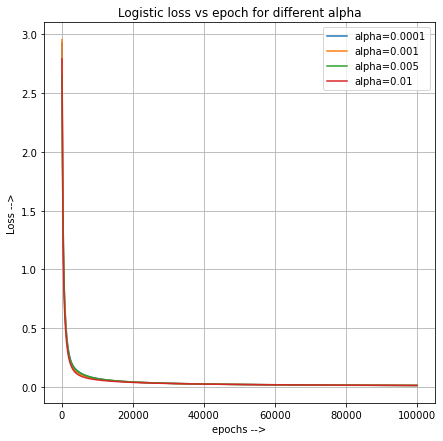

In [57]:
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Logistic loss vs epoch for different alpha')
plt.xlabel('epochs -->')
plt.ylabel('Loss -->')
for alpha in step_sizes:
    curve1,=ax1.plot(loss_alpha[alpha])
    plt.grid(visible='True')
    curve1.set_label('alpha={0}'.format(alpha))
plt.legend()

<font size="3">**4(d). Logistic regression convergence comparison for different epochs**<font>

In [58]:
weights=np.random.rand(xtrain.shape[1],1)
loss_GD=[]
diff=999
prev_weights=np.random.rand(xtrain.shape[1],1)
iters=0
max_iters=200000
while(diff>=0.000001 and iters<max_iters):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_GD.append(loss)
    weights=WeightUpdateGD(weights,xtrain,ytrain,0.01)
    diff=np.mean(np.abs((weights-prev_weights)))
    prev_weights=np.copy(weights)
    ypred= Predict(weights,xtest)
    acc=100*accuracy_score(ytest,ypred)
    iters+=1
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))
print("Final loss= {0}".format(loss))
print("required epochs for Gradient descent={0}".format(iters))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

Final loss= 0.0012846981636210398
required epochs for Gradient descent=200000


In [59]:
weights=np.random.rand(xtrain.shape[1],1)
loss_RCD=[]
diff=999
iters=0
prev_weights=np.random.rand(xtrain.shape[1],1)
loss=100
max_iters=200000
while(loss>=0.0008 and iters<max_iters):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_RCD.append(loss)
    weights=WeightUpdateRCD(weights,xtrain,ytrain,stepsize=0.01)
    diff=np.mean(np.abs((weights-prev_weights)))
    prev_weights=np.copy(weights)
    ypred= Predict(weights,xtest)
    iters+=1
    #print(loss)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))
print("Final loss= {0}".format(loss))
print("required epochs for random feature selection coordinate descent={0}".format(iters))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

Final loss= 0.012864027918244304
required epochs for random feature selection coordinate descent=200000


In [60]:
weights=np.random.rand(xtrain.shape[1],1)
loss_CD=[]
diff=999
iters=0
loss=100
prev_weights=np.random.rand(xtrain.shape[1],1)
max_iters=200000
while(loss>=0.0008 and iters<max_iters):
    loss=Lossfunction(weights,xtrain,ytrain)
    loss_CD.append(loss)
    weights=WeightUpdateCD(weights,xtrain,ytrain,stepsize=0.01)
    diff=np.mean(np.abs((weights-prev_weights)))
    prev_weights=np.copy(weights)
    ypred= Predict(weights,xtest)
    iters+=1
    #print(loss)
ypred= Predict(weights,xtest)
print(classification_report(ytest,ypred))
print("Final loss= {0}".format(loss))
print("required epochs for greedy coordinate descent={0}".format(iters))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

Final loss= 0.007495119175856397
required epochs for greedy coordinate descent=200000
